### Importing Libraries

In [435]:
import pandas as pd
import numpy as np

In [436]:
import matplotlib.pyplot as plt
import seaborn as sns

### Loading DataSet

In [437]:
df = pd.read_csv("C:/Users/doppa/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [438]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [439]:
df.shape

(7043, 21)

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [441]:
df.shape

(7043, 21)

In [442]:
new_df = df[df["TotalCharges"] !=" "]

In [443]:
new_df["TotalCharges"] = pd.to_numeric(new_df["TotalCharges"])

C:\Users\doppa\AppData\Local\Temp\ipykernel_21088\1151475353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["TotalCharges"] = pd.to_numeric(new_df["TotalCharges"])


In [444]:
new_df["SeniorCitizen"] = new_df["SeniorCitizen"].astype(str)

C:\Users\doppa\AppData\Local\Temp\ipykernel_21088\2646532135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["SeniorCitizen"] = new_df["SeniorCitizen"].astype(str)


In [445]:
new_df["SeniorCitizen"].dtype

dtype('O')

In [446]:
categorical_df = new_df[['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',"SeniorCitizen"]]
categorical_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


In [447]:
numerical_df = new_df.select_dtypes(include=["int",'float'])
numerical_df.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


### Data Analysis

In [448]:
numerical_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [449]:
categorical_df.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'],
      dtype='object')

In [450]:
for i in categorical_df:
    print("*"*40,i,"*"*40)
    print("No. of unique values: ",categorical_df[i].nunique())
    print("Unique categories: ",categorical_df[i].unique())

**************************************** gender ****************************************
No. of unique values:  2
Unique categories:  ['Female' 'Male']
**************************************** Partner ****************************************
No. of unique values:  2
Unique categories:  ['Yes' 'No']
**************************************** Dependents ****************************************
No. of unique values:  2
Unique categories:  ['No' 'Yes']
**************************************** PhoneService ****************************************
No. of unique values:  2
Unique categories:  ['No' 'Yes']
**************************************** MultipleLines ****************************************
No. of unique values:  3
Unique categories:  ['No phone service' 'No' 'Yes']
**************************************** InternetService ****************************************
No. of unique values:  3
Unique categories:  ['DSL' 'Fiber optic' 'No']
**************************************** OnlineSecuri

In [451]:
for i in categorical_df:
    print("*"*20,i,"*"*20)
    print(categorical_df[i].value_counts())

******************** gender ********************
gender
Male      3549
Female    3483
Name: count, dtype: int64
******************** Partner ********************
Partner
No     3639
Yes    3393
Name: count, dtype: int64
******************** Dependents ********************
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
******************** PhoneService ********************
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
******************** MultipleLines ********************
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
******************** InternetService ********************
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
******************** OnlineSecurity ********************
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
******************** OnlineBackup *

<Axes: xlabel='gender', ylabel='count'>

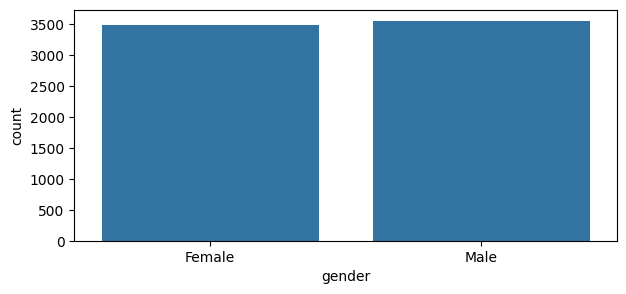

In [452]:
fig = plt.figure(figsize=(7,3))
sns.countplot(categorical_df,x="gender")

<Axes: xlabel='Churn', ylabel='count'>

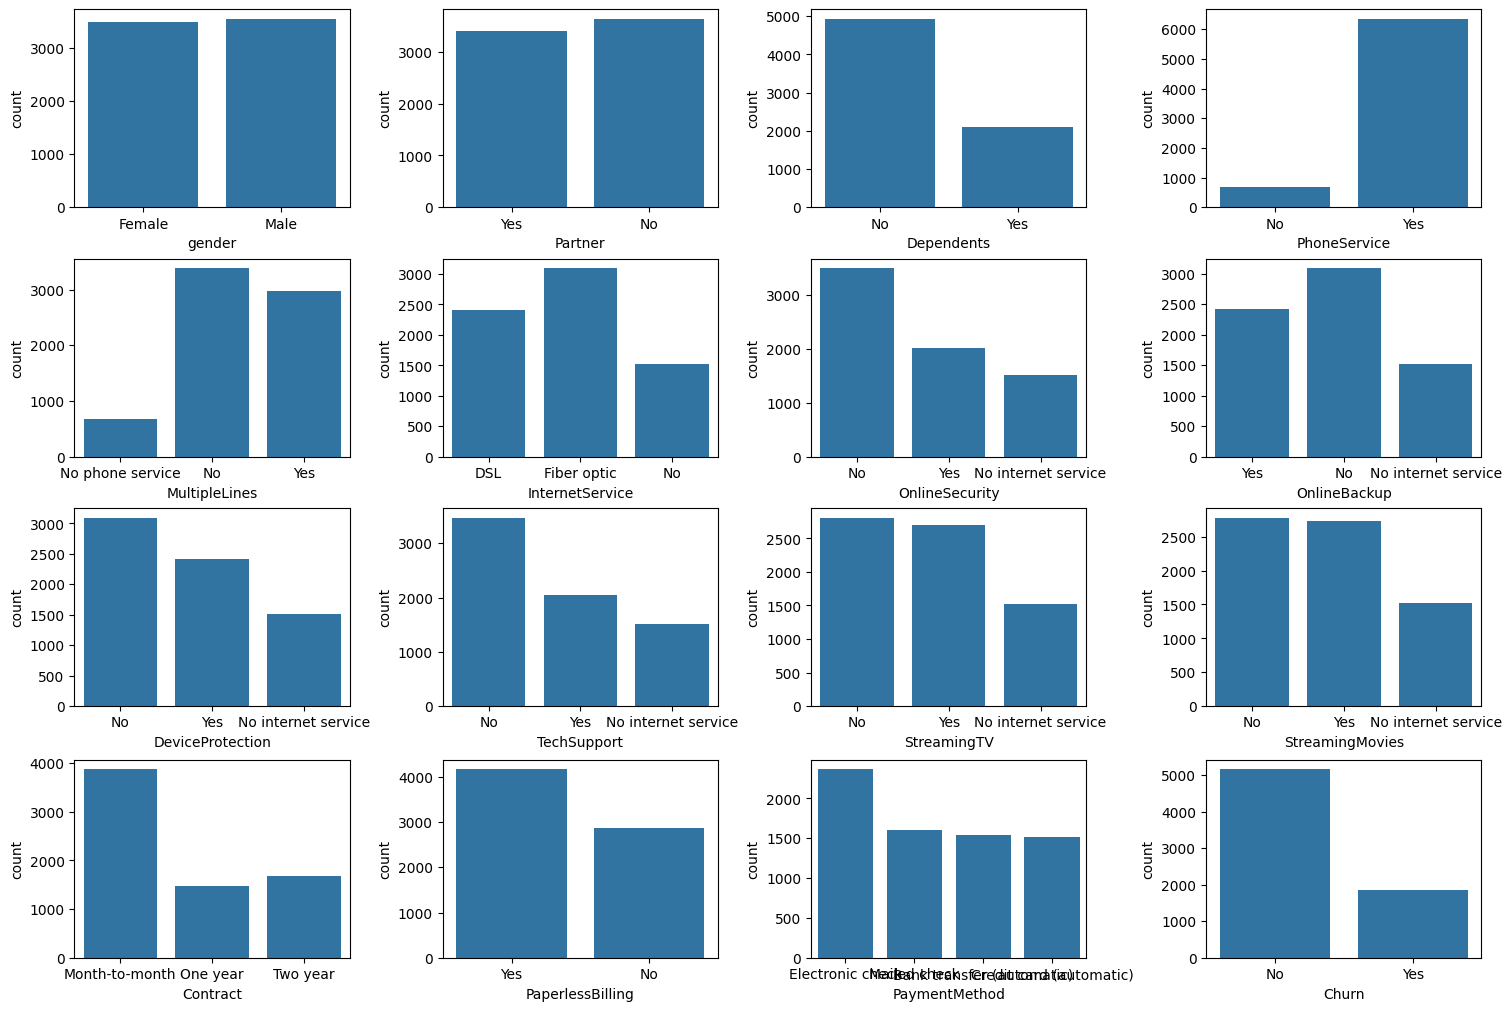

In [453]:
fig,axs = plt.subplots(4,4,figsize=(15,10),layout="constrained")
sns.countplot(categorical_df,x="gender",ax=axs[0][0])
sns.countplot(categorical_df,x="Partner",ax=axs[0][1])
sns.countplot(categorical_df,x="Dependents",ax=axs[0][2])
sns.countplot(categorical_df,x="PhoneService",ax=axs[0][3])
sns.countplot(categorical_df,x="MultipleLines",ax=axs[1][0])
sns.countplot(categorical_df,x="InternetService",ax=axs[1][1])
sns.countplot(categorical_df,x="OnlineSecurity",ax=axs[1][2])
sns.countplot(categorical_df,x="OnlineBackup",ax=axs[1][3])
sns.countplot(categorical_df,x="DeviceProtection",ax=axs[2][0])
sns.countplot(categorical_df,x="TechSupport",ax=axs[2][1])
sns.countplot(categorical_df,x="StreamingTV",ax=axs[2][2])
sns.countplot(categorical_df,x="StreamingMovies",ax=axs[2][3])
sns.countplot(categorical_df,x="Contract",ax=axs[3][0])
sns.countplot(categorical_df,x="PaperlessBilling",ax=axs[3][1])
sns.countplot(categorical_df,x="PaymentMethod",ax=axs[3][2])
sns.countplot(categorical_df,x="Churn",ax=axs[3][3])

In [454]:
categorical_df.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'],
      dtype='object')

In [455]:
numerical_df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

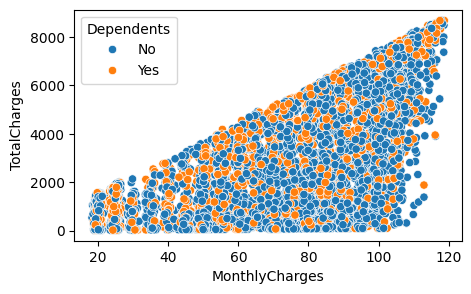

In [456]:
fig=plt.figure(figsize=(5,3))
sns.scatterplot(new_df,x="MonthlyCharges",y="TotalCharges",hue="Dependents")

### Relationship between InternetServices and Total Charges based on Contract

<Axes: xlabel='InternetService', ylabel='TotalCharges'>

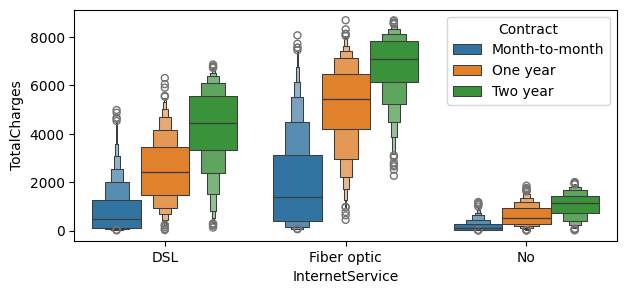

In [457]:
fig=plt.figure(figsize=(7,3))
sns.boxenplot(new_df,x="InternetService",y="TotalCharges",hue="Contract")

<Axes: xlabel='InternetService', ylabel='TotalCharges'>

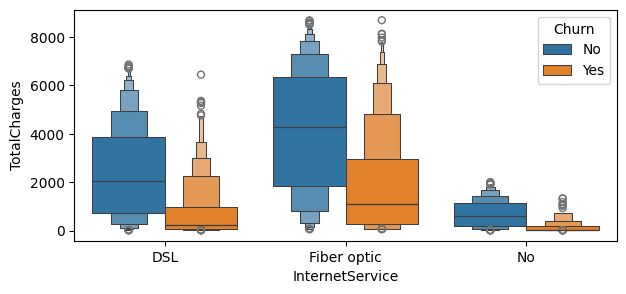

In [458]:
fig=plt.figure(figsize=(7,3))
sns.boxenplot(new_df,x="InternetService",y="TotalCharges",hue="Churn")

In [459]:
numerical_df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [460]:
categorical_df.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'],
      dtype='object')

<Axes: xlabel='tenure', ylabel='TotalCharges'>

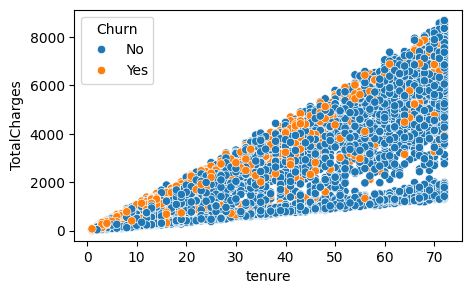

In [461]:
fig = plt.figure(figsize=(5,3))
sns.scatterplot(new_df,x="tenure",y="TotalCharges",hue="Churn")

<Axes: xlabel='MultipleLines', ylabel='TotalCharges'>

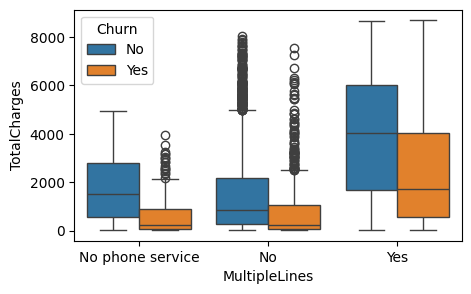

In [462]:
fig = plt.figure(figsize=(5,3))
sns.boxplot(new_df,y="TotalCharges",x="MultipleLines",hue="Churn")

### Classification of Churn

In [463]:
new_df["TotalCharges"].max()

8684.8

<Axes: xlabel='Churn', ylabel='count'>

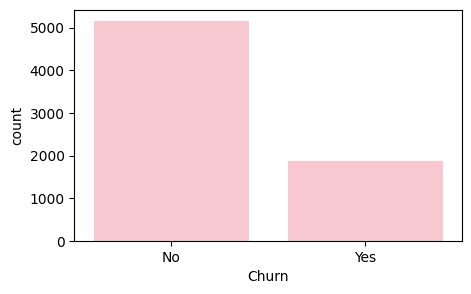

In [464]:
fig = plt.figure(figsize=(5,3))
sns.countplot(new_df,x="Churn",color="pink")

### Relationship between numerical columns

<Axes: >

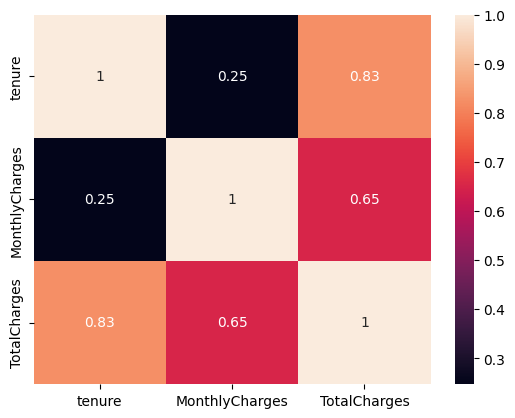

In [465]:
sns.heatmap(numerical_df.corr(),annot=True)

In [466]:
new_df.pop("customerID")

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7032, dtype: object

### Identifying Input and Target Variable

In [467]:
y = new_df.pop("Churn")

In [468]:
X = new_df

### Splitting

In [469]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [470]:
X_train_cat = X_train.select_dtypes(include=["object"])
X_train_num = X_train.select_dtypes(include=["float","int"])

## Training Phase

### Using StandardScaler for numerical data to convert into precised data

In [471]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                      columns = scaler.get_feature_names_out(),
                                      index=X_train_num.index)

In [472]:
X_train_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
2800,-0.501921,-1.480877,-0.810546
561,-1.192560,-1.372875,-0.965500
3903,0.838730,0.521322,0.901151
4434,-0.664424,0.856961,-0.401939
557,0.229343,0.189007,0.182418


### Using OneHotEncoding for categorical columns to convert categorical to numerical

In [473]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)
X_train_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

X_train_cat_transformed.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2800,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
561,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3903,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4434,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
557,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [474]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_transformed],axis=1)
X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2800,-0.501921,-1.480877,-0.810546,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
561,-1.192560,-1.372875,-0.965500,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3903,0.838730,0.521322,0.901151,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4434,-0.664424,0.856961,-0.401939,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
557,0.229343,0.189007,0.182418,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Testing Phase

In [475]:
X_test_cat = X_test.select_dtypes(include=["object"])
X_test_num = X_test.select_dtypes(include=["float","int"])

In [476]:
X_test_num_transformed = pd.DataFrame(scaler.fit_transform(X_test_num),
                                      columns = scaler.get_feature_names_out(),
                                      index=X_test_num.index)

In [477]:
X_test_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)

In [478]:
X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_transformed],axis=1)

In [479]:
X_test_transformed

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6226,1.330100,-1.290004,-0.272654,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3570,-0.680118,-1.464635,-0.884131,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
6798,-0.803193,0.186880,-0.616918,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6489,-1.295491,-1.519519,-1.005915,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2819,-1.172417,-0.310404,-0.915462,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.386528,0.161932,0.356460,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3160,1.494199,-0.608109,0.384743,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
483,1.617274,1.462521,2.573184,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4887,0.222429,-1.466298,-0.664184,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Building a Model

### KNN

In [480]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

### Prediction

In [481]:
y_test_pred = classifier.predict(X_test_transformed)

### Applying Evalution Metrics

In [482]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_test_pred)
acc

0.7573459715639811

In [483]:
result = pd.DataFrame({"Algorithm":["KNN"],
                       "Accuracy":[acc]})

In [484]:
result

,Algorithm,Accuracy
0,KNN,0.757346


### Random Forest

In [485]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [486]:
y_test_pred = classifier.predict(X_test_transformed)

In [487]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_test_pred)
acc

0.7933649289099526

In [488]:
row=pd.DataFrame({"Algorithm":["RandomForest"],"Accuracy":[acc]})
result=pd.concat([result,row])
result

,Algorithm,Accuracy
0,KNN,0.757346
0,RandomForest,0.793365


### Decision Tree

In [489]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [490]:
y_test_pred = classifier.predict(X_test_transformed)

In [491]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_test_pred)
acc

0.7080568720379147

In [492]:
row=pd.DataFrame({"Algorithm":["DecisionTree"],"Accuracy":[acc]})
result=pd.concat([result,row])

### Support Vector Machine

In [493]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed,y_train)

SVC()

In [494]:
y_test_pred = classifier.predict(X_test_transformed)

In [495]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_test_pred)
acc

0.804739336492891

In [496]:
row=pd.DataFrame({"Algorithm":["SVM"],"Accuracy":[acc]})
result=pd.concat([result,row])

### Logistic Regression

In [497]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_transformed,y_train)

LogisticRegression(max_iter=10000)

In [498]:
y_test_pred = classifier.predict(X_test_transformed)

In [499]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_test_pred)
acc

0.8023696682464455

In [500]:
row=pd.DataFrame({"Algorithm":["LogisticRegression"],"Accuracy":[acc]})
result=pd.concat([result,row])

### Comparing Accuracy

In [501]:
result

,Algorithm,Accuracy
0,KNN,0.757346
0,RandomForest,0.793365
0,DecisionTree,0.708057
0,SVM,0.804739
0,LogisticRegression,0.802370


<Axes: xlabel='Algorithm', ylabel='Accuracy'>

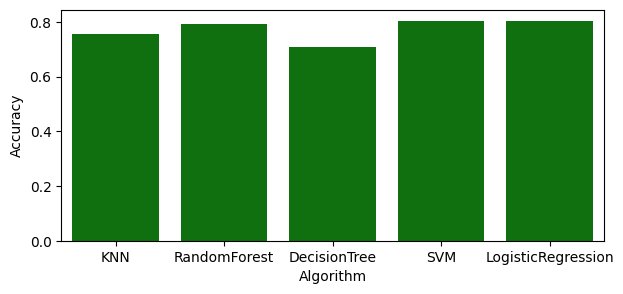

In [502]:
fig = plt.figure(figsize=(7,3))
sns.barplot(result,x="Algorithm",y="Accuracy",color="green")

### Hyperparametric Tuning

In [503]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]

for i in values:
    model = KNeighborsClassifier(n_neighbors=i)

    model.fit(X_train_transformed, y_train)

    y_train_pred = model.predict(X_train_transformed)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test_transformed)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 0.998, test: 0.720
> 2, train: 0.872, test: 0.745
> 3, train: 0.862, test: 0.740
> 4, train: 0.849, test: 0.765
> 5, train: 0.842, test: 0.757
> 6, train: 0.835, test: 0.767
> 7, train: 0.832, test: 0.762
> 8, train: 0.827, test: 0.773
> 9, train: 0.825, test: 0.768
> 10, train: 0.821, test: 0.779
> 11, train: 0.818, test: 0.776
> 12, train: 0.820, test: 0.778
> 13, train: 0.817, test: 0.773
> 14, train: 0.817, test: 0.783
> 15, train: 0.816, test: 0.777
> 16, train: 0.817, test: 0.784
> 17, train: 0.816, test: 0.777
> 18, train: 0.815, test: 0.783
> 19, train: 0.812, test: 0.787
> 20, train: 0.816, test: 0.784


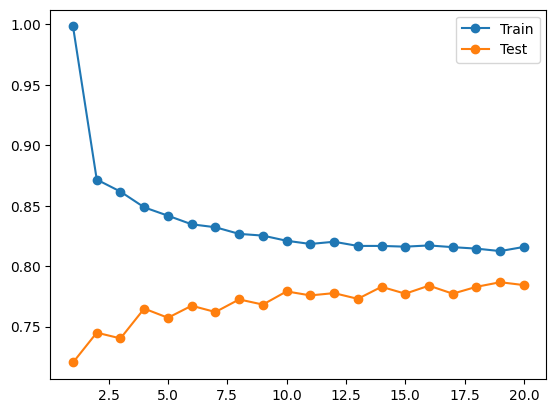

In [504]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [505]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]

for i in values:
    model = DecisionTreeClassifier(max_depth=i)

    model.fit(X_train_transformed, y_train)

    y_train_pred = model.predict(X_train_transformed)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test_transformed)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 0.731, test: 0.743
> 2, train: 0.764, test: 0.758
> 3, train: 0.788, test: 0.794
> 4, train: 0.795, test: 0.794
> 5, train: 0.807, test: 0.782
> 6, train: 0.811, test: 0.774
> 7, train: 0.828, test: 0.766
> 8, train: 0.843, test: 0.763
> 9, train: 0.859, test: 0.745
> 10, train: 0.882, test: 0.734
> 11, train: 0.905, test: 0.720
> 12, train: 0.920, test: 0.708
> 13, train: 0.938, test: 0.728
> 14, train: 0.952, test: 0.705
> 15, train: 0.961, test: 0.709
> 16, train: 0.974, test: 0.697
> 17, train: 0.979, test: 0.711
> 18, train: 0.984, test: 0.723
> 19, train: 0.988, test: 0.702
> 20, train: 0.991, test: 0.716


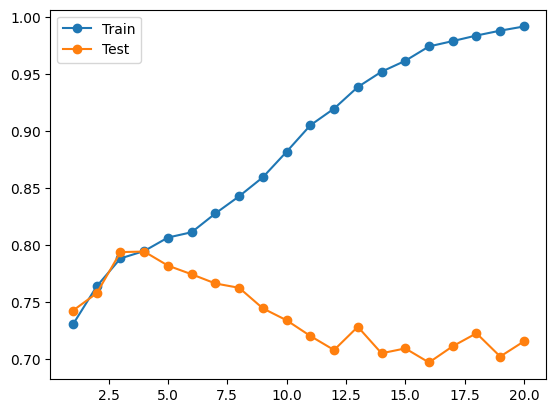

In [506]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()